# Biomarkers On Brains

## By Cooper Mellema

### This program plots discovered biomarkers on MNIST standard brains

In [1]:
import BiomarkersOnBrains as bob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import nilearn
import numpy as np
import pandas as pd
import pickle as pkl
import math
import re
from nilearn import plotting
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiSpheresMasker

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAutismTF_GPU_v5/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# import datasets module and use `fetch_atlas_basc_multiscale_2015` function
from nilearn import datasets, plotting

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

# We show here networks of 64, 197, 444
BASC064 = parcellations['scale064']
BASC122=parcellations['scale122']
BASC197=parcellations['scale197']

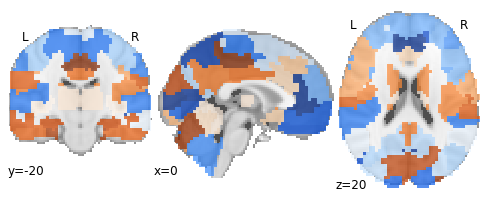

In [3]:
plotting.plot_roi(BASC064, cmap=plotting.cm.blue_orange_r, cut_coords=(0,-20,20), draw_cross=False)

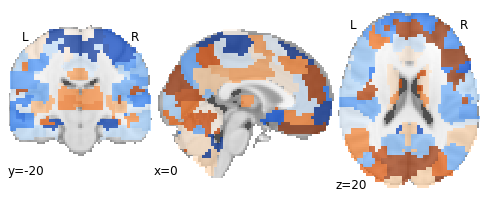

In [4]:
plotting.plot_roi(BASC122, cmap=plotting.cm.blue_orange_r, cut_coords=(0,-20,20), draw_cross=False)

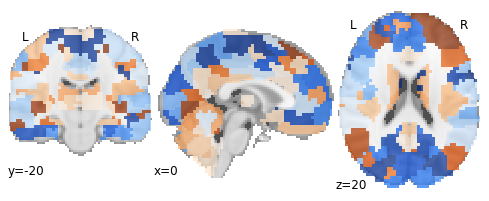

In [5]:
plotting.plot_roi(BASC197, cmap=plotting.cm.blue_orange_r, cut_coords=(0,-20,20), draw_cross=False)

In [6]:
dir(plotting.cm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_bwr_data',
 '_cm',
 '_cmap_d',
 '_cmapname',
 '_cmapname_r',
 '_cmaps_data',
 '_cmapspec',
 '_colors',
 '_concat_cmap',
 '_np',
 '_pigtailed_cmap',
 '_rotate_cmap',
 'alpha_cmap',
 'black_blue',
 'black_blue_r',
 'black_green',
 'black_green_r',
 'black_pink',
 'black_pink_r',
 'black_purple',
 'black_purple_r',
 'black_red',
 'black_red_r',
 'blue_orange',
 'blue_orange_r',
 'blue_red',
 'blue_red_r',
 'blue_transparent',
 'blue_transparent_full_alpha_range',
 'brown_blue',
 'brown_blue_r',
 'brown_cyan',
 'brown_cyan_r',
 'bwr',
 'bwr_r',
 'cold_hot',
 'cold_hot_r',
 'cold_white_hot',
 'cold_white_hot_r',
 'color',
 'cyan_copper',
 'cyan_copper_r',
 'cyan_orange',
 'cyan_orange_r',
 'dim_cmap',
 'green_transparent',
 'green_transparent_full_alpha_range',
 'hot_black_bone',
 'hot_black_bone_r',
 'hot_white_bone',
 'hot_white_bone_r',
 'k',
 'name',
 'ocean_hot',
 'ocean

In [7]:
# Fetch the atlas that will be used in this case
dBASC = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

In [8]:
# Set atlases per model
dModelAtlases={
     2:'scale122',
     5:'scale122'
}

In [9]:
# Set atlases per model
dModelAtlases={
     3:'scale197'
}

In [10]:
# iPermutations=1
# for iModel, sAtlasKey in dModelAtlases.items():
#     # Process the model and make the glass brain
#     iPermutations=1
#     sDir = f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison{iPermutations}Permutations'
#     bob.fProcessModel(iModel, sAtlas, iPermutations, sDir=sDir, flThresh=0, iTop=6)

In [11]:
# #iDeep=2 # for 122 rois
# #iDeep=1 # for 064 ROIs
# iDeep=3 # for 197 ROIs
# #iLin=5 # for 122 ROIs
# #iLin=4 #for 064 ROIs
# iLin=6 # for 197 ROIs

In [12]:
# os.path.join(sDir, f'RawImportances/Model{i+1}Importances.p')

In [13]:
dd={}
sDir = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/AtlasResolutionComparison8Permutations'
for i in range(15):
    dImportances = pkl.load(open(os.path.join(sDir, f'RawImportances/Model{i+1}Importances.p'), 'rb'))
    dd.update({i:dImportances})

In [14]:
qq=dd[1]

In [15]:
sDir = f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/AtlasResolutionComparison8Permutations'
d64Importances = pkl.load(open(os.path.join(sDir, f'64ROI_MeanImportances.p'), 'rb'))
pd64Importances = bob.fFormatImportances(d64Importances)
d122Importances = pkl.load(open(os.path.join(sDir, f'122ROI_MeanImportances.p'), 'rb'))
pd122Importances = bob.fFormatImportances(d122Importances)
d197Importances = pkl.load(open(os.path.join(sDir, f'197ROI_MeanImportances.p'), 'rb'))
pd197Importances = bob.fFormatImportances(d197Importances)

In [16]:
pd64Importances

,Importance
Site01,-0.487317
Site02,0.641017
Site03,-0.385993
Site04,-1.526132
Site05,-0.124322
...,...
ROI062-ROI063,-0.186789
ROI062-ROI064,-1.452353
ROI063-ROI063,-0.436655
ROI063-ROI064,-0.643238


In [17]:
pd64Importances = pd64Importances.loc[[idx for idx in pd64Importances.index if 'ROI' in idx.upper()]]
pd122Importances = pd122Importances.loc[[idx for idx in pd122Importances.index if 'ROI' in idx.upper()]]
pd197Importances = pd197Importances.loc[[idx for idx in pd197Importances.index if 'ROI' in idx.upper()]]

In [18]:
pd64Importances=pd64Importances.sort_values(by=['Importance'], axis=0, ascending=False)
pd122Importances=pd122Importances.sort_values(by=['Importance'], axis=0, ascending=False)
pd197Importances=pd197Importances.sort_values(by=['Importance'], axis=0, ascending=False)

In [20]:
# pdDeepImportances=pdDeepImportances.sort_values(by=['Importance'], axis=0, ascending=False)
# pdLinImportances=pdLinImportances.sort_values(by=['Importance'], axis=0, ascending=False)

In [22]:
# pdDeepImportances.head(26).sort_values(by=['Importance'], axis=0).plot(kind='barh')

In [23]:
# pdDeepImportances.head(15).sort_values(by=['Importance'], axis=0).plot(kind='barh')

In [24]:
# pdLinImportances.head(15).sort_values(by=['Importance'], axis=0).plot(kind='barh')

In [25]:
pdTop64=pd64Importances.head(15)
pdTop122=pd122Importances.head(15)
pdTop197=pd197Importances.head(15)

In [72]:
# Use this to populate a list of deep and a list of linear ROIs
ls64ROIs=list()
ls122ROIs=list()
ls197ROIs=list()
for sIndex in pdTop64.index:
    lsTwo=re.findall('\d+', sIndex)
    ls64ROIs.append(lsTwo)
ls64ROIs=np.unique(ls64ROIs).astype(int)

In [73]:
for sIndex in pdTop122.index:
    lsTwo=re.findall('\d+', sIndex)
    ls122ROIs.append(lsTwo)
ls122ROIs=np.unique(ls122ROIs).astype(int)

In [74]:
for sIndex in pdTop197.index:
    lsTwo=re.findall('\d+', sIndex)
    ls197ROIs.append(lsTwo)
ls197ROIs=np.unique(ls197ROIs).astype(int)

In [75]:
#append additional ROIs 
ls64ROIs=np.concatenate([ls64ROIs,np.array([1,36])])
ls122ROIs=np.concatenate([ls122ROIs,np.array([1,36,109])])
ls197ROIs=np.concatenate([ls197ROIs,np.array([97,109,27,192,24,133,19,76,113,172])])

In [76]:
aCentroids=bob.fFindCentroids(dBASC['scale197'])

In [77]:
aCentroids=bob.fFindCentroids(dBASC['scale064'])
ls64Loc=ls64ROIs
ls64Loc[:]=[x-1 for x in ls64ROIs]
a64Locations=aCentroids[ls64Loc]

d64ROILoc={}
for iROI in ls64ROIs:
    d64ROILoc.update({iROI: aCentroids[iROI-1]})

In [78]:
d64ROILoc

{1: array([-24.94559099,   1.21763602,   1.27579737]),
 2: array([-43.35348837,  -8.99534884,  -2.32093023]),
 4: array([-12.496, -18.88 ,   6.56 ]),
 7: array([-6.79787234, 21.32446809, 28.28723404]),
 8: array([ -9.86029412,  11.77205882, -11.46323529]),
 10: array([-7.79617834, 31.08280255, 39.78980892]),
 14: array([-57.32051282,  -4.41666667,  28.94871795]),
 15: array([-24.19726027, -70.24657534, -53.92054795]),
 19: array([ -7.71028037, -49.58878505,  32.29906542]),
 22: array([-43.23979592, -17.19387755, -27.04081633]),
 26: array([-25.36708861,   1.30696203,  57.85759494]),
 27: array([-14.44624746, -85.12778905,  27.38539554]),
 28: array([-48.5640599 , -46.41430948, -16.35607321]),
 32: array([-10.33898305, -31.3559322 ,  47.18644068]),
 43: array([-16.2145749 , -90.81781377,   0.28340081]),
 44: array([-30.30096051, -72.08110993, -38.41622199]),
 47: array([-42.2617801 , -33.27225131,  51.01570681]),
 48: array([ -9.75      , -53.64347826, -45.68913043]),
 49: array([42.548

In [79]:
aCentroids=bob.fFindCentroids(dBASC['scale122'])
ls122Loc=ls122ROIs
ls122Loc[:]=[x-1 for x in ls122ROIs]
a122Locations=aCentroids[ls122Loc]

d122ROILoc={}
for iROI in ls122ROIs:
    d122ROILoc.update({iROI: aCentroids[iROI-1]})

In [80]:
d122ROILoc

{0: array([-11.06666667,   8.775     ,  60.35      ]),
 3: array([ -8.625  , -45.04375,  -8.6375 ]),
 4: array([-48.23300971, -65.33980583,  33.46116505]),
 9: array([ -5.81818182, -75.63636364, -34.18181818]),
 14: array([ -8.07518797, -55.38345865, -56.4962406 ]),
 17: array([ -5.40425532, -52.04255319,  25.85106383]),
 29: array([-13.37037037, -58.42592593,  -4.51851852]),
 30: array([-31.90909091,  18.84090909, -16.28409091]),
 31: array([-10.74093264, -14.58549223,   9.3626943 ]),
 35: array([ -6.49137931,  37.5862069 , -12.0862069 ]),
 41: array([-18.23611111, -93.29166667, -14.98611111]),
 46: array([-20.7826087 , -64.34782609, -56.56521739]),
 49: array([-45.11157025, -60.85123967,  -7.87603306]),
 61: array([-11.58736059,  36.58364312, -19.68773234]),
 68: array([-22.61688312, -26.27597403,  65.27597403]),
 69: array([ 26.11807229, -70.43373494,  43.93975904]),
 72: array([-13.93373494, -48.24096386,   7.19879518]),
 79: array([-27.97247706, -44.00917431, -11.66972477]),
 87: 

In [71]:
aCentroids=bob.fFindCentroids(dBASC['scale197'])
ls197Loc=ls197ROIs
ls197Loc[:]=[x-1 for x in ls197ROIs]
a197Locations=aCentroids[ls197Loc]

d197ROILoc={}
for iROI in ls197ROIs:
    d197ROILoc.update({iROI: aCentroids[iROI-1]})

In [62]:
d197ROILoc

{1: array([-14.04545455,  22.18181818,  -2.06818182]),
 3: array([ -9.11538462, -48.65384615, -36.38461538]),
 7: array([-41.71428571, -77.57142857,  34.32142857]),
 9: array([ -8.86363636, -12.79545455,   4.61363636]),
 13: array([ -8.23170732, -25.2195122 ,  74.75609756]),
 25: array([ -8.12359551, -26.01123596,  29.98876404]),
 27: array([ -7.20512821, -63.20512821, -38.8974359 ]),
 32: array([ -5.35714286,  44.03061224, -22.35714286]),
 36: array([-54.975, -48.355,  31.09 ]),
 42: array([ -8.625  , -45.04375,  -8.6375 ]),
 52: array([-42.5625    , -78.46428571,   6.51785714]),
 53: array([-44.1657754 , -55.25668449, -46.77540107]),
 58: array([-9.29347826, 25.9673913 , 38.95652174]),
 70: array([ -9.54, -72.88,  10.45]),
 72: array([-47.59756098,  40.07317073,  -5.90243902]),
 104: array([-31.90909091,  18.84090909, -16.28409091]),
 110: array([-53.30660377,  17.77830189,   9.47641509]),
 116: array([ -6.49137931,  37.5862069 , -12.0862069 ]),
 120: array([-9.37704918,  9.70491803,

In [46]:
def fMapMNIToTalairach(x,y,z):
    x1=0.88*x-0.8
    y1=0.97*y-3.32
    z1=0.05*y +0.88*z-0.44
    return x1, y1, z1

In [59]:
from nilearn.datasets import fetch_atlas_talairach
import nibabel as nib
lsLabels = fetch_atlas_talairach('ba')['labels']
cImg=fetch_atlas_talairach('ba')['maps']
fMapMNIToTalairach(-24.94559099,   1.21763602,   1.27579737)
lsLabels[int(cImg.get_fdata()[int(-22.7521200712), int(-2.1388930606), int(0.7435834866000002)])]

'Background'

In [63]:
np.savetxt('/project/bioinformatics/DLLab/s169682/Code/AutismProject/JournalPaperData/64ROIMNISpace.csv', np.stack([v for v in d64ROILoc.values()]), delimiter=',')

In [64]:
np.savetxt('/project/bioinformatics/DLLab/s169682/Code/AutismProject/JournalPaperData/122ROIMNISpace.csv', np.stack([v for v in d122ROILoc.values()]), delimiter=',')

In [65]:
np.savetxt('/project/bioinformatics/DLLab/s169682/Code/AutismProject/JournalPaperData/197ROIMNISpace.csv', np.stack([v for v in d197ROILoc.values()]), delimiter=',')

In [148]:
dROICorrespondence64={
    1: 'L. Putamen (BA 49)',
    2: 'L. Insula (BA 13)',
    4: 'L. Thalamus (BA 50)',
    7: 'L. Dorsal Cingulate (BA 32)',
    8: 'L. Nucleus Accumbens (BA 52)',
    10: 'L. Frontal Cortex (BA 8)',
    14: 'L. Frontal Cortex (BA 8)',
    15: 'L. Posterior Lobe of Cerebellum',
    19: 'L. Insula (BA 13)',
    22: 'L. Language Association Cortex (BA 39)',
    26: 'L. Supplementary Motor (BA 6)',
    27: 'L. Visual Association (BA 18)',
    28: 'L. Fusiform Area (BA 37)',
    32: 'L. Sensory Association (BA 5)',
    43: 'L. Visual Association (BA 18)',
    44: 'L. Posterior Lobe of Cerebellum',
    47: 'L. Primary Sensory (BA 1)',
    48: 'L. Posterior Lobe of Cerebellum',
    49: 'R. Prefrontal Cortex (BA 10)',
    53: 'L. Prefrontal Cortex (BA 10)',
    59: 'L. Visual Association (BA 18)',
    61: 'L. Frontal Cortex (BA 8)',
    62: 'L. Parietal Cortex (BA 7)'
}

In [149]:
dROICorrespondence122={
    0: 'L. Supplementary Motor (BA 6)',
    3: 'L. Anterior Lobe of the Cerebellum',
    4: 'L. Language Association Cortex (BA 39)',
    9: 'L. Flocculonodular Lobe of Cerebellum',
    14: 'L. Posterior Lobe of the Cerebellum',
    17: 'L. Posterior Cingulate (BA 23)', # Language ish, association for sure
    29: 'L. Secondary Visual Cortex (BA 19)',
    30: 'L. Language Association Cortex (BA 47)',
    31: 'L. Thalamus (BA 50)',
    35: 'L. Orbitofrontal Cortex (BA 11)', # association
    41: 'L. Visual Association (BA 18)',
    46: 'L. Posterior Lobe of the Cerebellum',
    49: 'L. Fusiform Area (BA 37)',
    61: 'L. Orbitofrontal Cortex (BA 11)',
    68: 'L. Primary Motor (BA 4)',
    69: 'L. Parietal Cortex (BA 7)',
    72: 'L Retrosplenial Cortex (BA 30)',
    79: 'L. Fusiform Area (BA 37)',
    87: 'L. Prefrontal Cortex (BA 10)',
    94: 'L. Prefrontal Cortex (BA 10)',
    97: 'L. Anterior Lobe of the Cerebellum',
    99: 'L. Primary Sensory (BA 1)',
    109: 'L. Language Association Cortex (BA 47)',
    117: 'L. Fusiform Area (BA 37)',
    119: 'L. Auditory Association Cortex (BA 22)'
}

In [150]:
dROICorrespondence197={
    1: 'L. Caudate (BA 48)',
    3: 'L. Posterior Lobe of Cerebellum',
    7: 'L. Language Association Cortex (BA 39)',
    9: 'L. Thalamus (BA 50)',
    13: 'L. Primary Motor (BA 4)',
    25: 'L. Posterior Cingulate (BA 23)', # Language ish, association for sure
    27: 'L. Posterior Lobe of Cerebellum',
    32: 'L. Orbitofrontal Cortex (BA 11)',
    36: 'L. Language Association Cortex (BA 39)',
    42: 'L. Anterior Lobe of the Cerebellum',
    52: 'L. Secondary Visual Cortex (BA 19)',
    53: 'L. Posterior Lobe of Cerebellum',
    58: 'L. Frontal Cortex (BA 8)',
    70: 'L. Primary Visual Cortex (BA 17)',
    72: 'L. Language Association Cortex (BA 47)',
    104: 'L. Language Association Cortex (BA 47)',
    110: 'L. Frontal Cortex (BA 44)',
    116: 'L. Orbitofrontal Cortex (BA 11)',
    120: 'L. Supplementary Motor (BA 6)',
    127: 'L. Language Association Cortex (BA 39)',
    129: 'R. Language Association Cortex (BA 39)',
    130: 'L. Prefrontal Cortex (BA 10)',
    146: 'R. Inferior Temporal Cortex (BA 20)', # association 
    147: 'L. Visual Association (BA 18)',
    170: 'R. Broca\'s Area (BA 45)',
    176: 'L. Posterior Cingulate (BA 31)', # Language ish, association for sure
    187: 'L. Anterior Cingulate (BA 24)', #association
    188: 'L. Supplementary Motor (BA 6)',
    192: 'L. Language Association Cortex (BA 38)',
    195: 'L. Prefrontal Cortex (BA 10)'
}

In [151]:
# dROICorrespondence197={
#     2: 'L. Dorsal Cingulate (BA 32)',
#     3: 'L. Posterior Lobe of Cerebellum', 
#     14: 'L. Anterior Lobe of Cerebellum', 
#     18: 'L. Caudate (BA 48)', 
#     21: 'L. Putamen (BA 49)', 
#     23: 'L. Insula (BA 13)',
#     34: 'L. Caudate (BA 48)', 
#     35: 'R. Primary Sensory (BA 1)', 
#     44: 'L. Prefrontal Cortex (BA 9)', 
#     46: 'L. Secondary Visual Cortex (BA 19)', 
#     55: 'L. Posterior Lobe of Cerebellum', 
#     60: 'L. Secondary Visual Cortex (BA 19)', 
#     80: 'L. Supplementary Motor (BA 6)', 
#     104: 'L. Language Association Cortex (BA 47)', 
#     105: 'L. Primary Motor (BA 4)', 
#     113: 'R. Supplementary Motor (BA 6)', 
#     122: 'L. Visual Association Cortex (BA 18)', 
#     130: 'L. Prefrontal Cortex (BA 10)', 
#     142: 'L. Secondary Visual Cortex (BA 19)', 
#     158: 'L. Prefrontal Cortex (BA 10)', 
#     164: 'L. Secondary Visual Cortex (BA 19)', 
#     170: 'R. Broca\'s Area (BA 45)', 
#     171: 'L. Frontal Cortex (BA 44)', 
#     177: 'R. Primary Sensory (BA 1)', 
#     186: 'L. Parietal Cortex (BA 7)', 
#     197: 'L. Insula (BA 13)'
# }

In [152]:
# #look up coordinates on http://sprout022.sprout.yale.edu/mni2tal/mni2tal.html, record brodman areas
# dROICorrespondence064={
#     1:'L. Putamen (BA 49)',
#     2:'L. Insula (BA 13)',
#     3:'L. Anterior Lobe of Cerebellum',
#     5:'L. Posterior Lobe of Cerebellum',
#     6:'L. Anterior Lobe of Cerebellum',
#     7:'L. Dorsal Cingulate (BA 32)',
#     8:'L. Nucleus Accumbens (BA 52)',
#     9:'L. Language Association Cortex (BA 38)',
#     10:'L. Frontal Cortex (BA 8)',
#     11:'L. Posterior Lobe of Cerebellum',
#     15:'L. Posterior Lobe of Cerebellum',
#     16:'L. Fusiform (BA 37)',
#     20:'L. Language Association Cortex (BA 39)',
#     24:'L. Auditory Association Cortex (BA 21)',
#     25:'L. Hippocampus (54)',
#     29:'L. Anterior Lobe of Cerebellum',
#     30:'L. Visual Association (BA 18)',
#     31:'R. Language Association Cortex (BA 39)',
#     34:'L. Dorsal Cingulate (BA 32)',
#     36:'L. Language Association Cortex (BA 38)',
#     38:'L. Visual Association (BA 18)',
#     39:'R. Frontal Cortex (BA 8)',
#     44:'L. Posterior Lobe of Cerebellum',
#     45:'L. Supplementary Motor (BA 6)',
#     54:'R. Frontal Cortex (BA 44)',
#     57:'L. Posterior Lobe of Cerebellum',
#     59:'L. Visual Association (BA 18)',
#     60:'L. Supplementary Motor (BA 6)',
#     63:'L. Frontal Cortex (BA 8)',
#     64:'L. Auditory Association Cortex (BA 21)',
# }

In [153]:
# #look up coordinates on http://sprout022.sprout.yale.edu/mni2tal/mni2tal.html, record brodman areas
# dROICorrespondence122={
#     1: 'L. Prim. Motor (BA 4)',
#     2: 'L. Caudate (BA 48)',
#     4: 'L. Language Association Cortex (BA 39)',
#     5: 'L. Supplementary Motor (BA 6)',
#     6: 'L. Dorsal Cingulate (BA 32)',
#     10: 'L. Caudate (BA 48)',
#     12: 'L. Insula (BA 13)',
#     15: 'R. Language Association Cortex (BA 39)',
#     18: 'L Cerebellum - Posterior Lobe',
#     25: 'L. Putamen (BA 49)',
#     26: 'L. Supplementary Motor (BA 6)',
#     31: 'L. Thalamus (BA 50)',
#     32: 'R. Auditory Association Cortex (BA 21)',
#     36: 'L. Thalamus (BA 50)',
#     39: 'L. Secondary Visual Cortex (BA 19)',
#     41: 'L. Visual Association (BA 18)',
#     42: 'L. Hippocampus (BA 54)',
#     44: 'L. Cerebellum - Anterior Lobe',
#     45: 'L. Caudate (BA 48)',
#     48: 'L. Cerebellum - Anterior Lobe',
#     50: 'L. Language Association Cortex (BA 39)',
#     56: 'L. Secondary Visual Cortex (BA 19)',
#     71: 'L. Hippocampus (BA 54)',
#     72: 'L Retrosplenial Cortex (BA 30)',
#     73: 'R. Supplementary Motor (BA 6)',
#     75: 'L. Prefrontal Cortex (BA 10)',
#     87: 'L. Prefrontal Cortex (BA 10)',
#     88: 'L. Auditory Association Cortex (BA 22)',
#     98: 'R. Language Association Cortex (BA 39)',
#     101: 'L. Secondary Visual Cortex (BA 19)',
#     109: 'L. Language Association Cortex (BA 47)',
#     110: 'L. Supplementary Motor (BA 6)',
#     120: "L. Broca's Area (BA 45)",
#     122: 'L. Supplementary Motor (BA 6)'
# }

In [154]:
pdTop64.index

Index(['ROI009-ROI020', 'ROI003-ROI011', 'ROI005-ROI054', 'ROI016-ROI063',
       'ROI027-ROI033', 'ROI050-ROI062', 'ROI023-ROI028', 'ROI060-ROI060',
       'ROI008-ROI045', 'ROI005-ROI050', 'ROI048-ROI050', 'ROI002-ROI015',
       'ROI020-ROI049', 'ROI005-ROI063', 'ROI029-ROI044'],
      dtype='object')

In [155]:
lsTwo=re.findall('\d+', sIndex)
dROICorrespondence64.keys(),lsTwo[0]

(dict_keys([1, 2, 4, 7, 8, 10, 14, 15, 19, 22, 26, 27, 28, 32, 43, 44, 47, 48, 49, 53, 59, 61, 62]),
 '033')

In [156]:
for sIndex in pdTop64.index:
    lsTwo=re.findall('\d+', sIndex)
    pdTop64=pdTop64.rename(index={sIndex: f'{dROICorrespondence64[int(lsTwo[0])-1]} to '\
                                  f'{dROICorrespondence64[int(lsTwo[1])-1]}'})
    pdTop64=pdTop64.rename(index={sIndex: sIndex.replace('-', ' to ')})

In [157]:
pdTop64

,Importance
L. Nucleus Accumbens (BA 52) to L. Insula (BA 13),9.362732
L. Insula (BA 13) to L. Frontal Cortex (BA 8),7.152300
L. Thalamus (BA 50) to L. Prefrontal Cortex (BA 10),6.310722
L. Posterior Lobe of Cerebellum to L. Parietal Cortex (BA 7),5.928544
L. Supplementary Motor (BA 6) to L. Sensory Association (BA 5),5.388479
R. Prefrontal Cortex (BA 10) to L. Frontal Cortex (BA 8),5.368312
L. Language Association Cortex (BA 39) to L. Visual Association (BA 18),5.360443
L. Visual Association (BA 18) to L. Visual Association (BA 18),5.224196
L. Dorsal Cingulate (BA 32) to L. Posterior Lobe of Cerebellum,5.132710
L. Thalamus (BA 50) to R. Prefrontal Cortex (BA 10),5.115987


In [158]:
for sIndex in pdTop122.index:
    lsTwo=re.findall('\d+', sIndex)
    pdTop122=pdTop122.rename(index={sIndex: f'{dROICorrespondence122[int(lsTwo[0])-1]} to '\
                                  f'{dROICorrespondence122[int(lsTwo[1])-1]}'})
    pdTop122=pdTop122.rename(index={sIndex: sIndex.replace('-', ' to ')})

In [163]:
pdTop122

,Importance
L. Posterior Lobe of the Cerebellum to L. Fusiform Area (BA 37),7.937763
L. Posterior Cingulate (BA 23) to L. Visual Association (BA 18),7.790789
L. Flocculonodular Lobe of Cerebellum to L. Primary Motor (BA 4),7.686485
L. Language Association Cortex (BA 39) to L. Fusiform Area (BA 37),7.359350
L. Supplementary Motor (BA 6) to L. Auditory Association Cortex (BA 22),7.278752
L. Supplementary Motor (BA 6) to L. Orbitofrontal Cortex (BA 11),7.259787
L. Thalamus (BA 50) to L. Language Association Cortex (BA 47),6.856795
L. Posterior Cingulate (BA 23) to L Retrosplenial Cortex (BA 30),6.828349
L. Language Association Cortex (BA 47) to L. Prefrontal Cortex (BA 10),6.738268
L. Anterior Lobe of the Cerebellum to L. Posterior Lobe of the Cerebellum,6.515437


In [159]:
for sIndex in pdTop197.index:
    lsTwo=re.findall('\d+', sIndex)
    pdTop197=pdTop197.rename(index={sIndex: f'{dROICorrespondence197[int(lsTwo[0])-1]} to '\
                                  f'{dROICorrespondence197[int(lsTwo[1])-1]}'})
    pdTop197=pdTop197.rename(index={sIndex: sIndex.replace('-', ' to ')})

In [164]:
pdTop197

,Importance
L. Language Association Cortex (BA 39) to L. Supplementary Motor (BA 6),12.673232
L. Anterior Lobe of the Cerebellum to L. Language Association Cortex (BA 47),7.763607
L. Primary Visual Cortex (BA 17) to L. Prefrontal Cortex (BA 10),7.177383
L. Posterior Cingulate (BA 23) to L. Posterior Lobe of Cerebellum,7.020359
L. Secondary Visual Cortex (BA 19) to L. Prefrontal Cortex (BA 10),6.821461
L. Language Association Cortex (BA 39) to R. Inferior Temporal Cortex (BA 20),6.695842
L. Language Association Cortex (BA 39) to L. Visual Association (BA 18),6.674905
L. Posterior Lobe of Cerebellum to L. Orbitofrontal Cortex (BA 11),6.298047
L. Thalamus (BA 50) to L. Anterior Cingulate (BA 24),6.182896
L. Frontal Cortex (BA 8) to R. Broca's Area (BA 45),6.151491


In [170]:
lsColors[0].reverse()

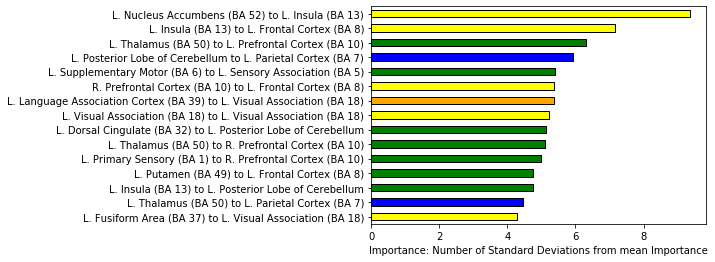

In [182]:
lsColors=[[
    'yellow',
    'yellow',
    'g',
    'b',
    'g',
    'yellow',
    'orange',
    'yellow',
    'g',
    'g',
    'g',
    'g',
    'g',
    'b',
    'yellow'
]]
lsColors[0].reverse()
pdTop64.sort_values(by=['Importance'], axis=0).plot(kind='barh', legend=None, edgecolor='k', stacked=True, color=lsColors)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')
plt.savefig('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/AtlasResolutionComparison8Permutations/64ROI_FunctionalImportancesColorCoded.png', bbox_inches='tight')

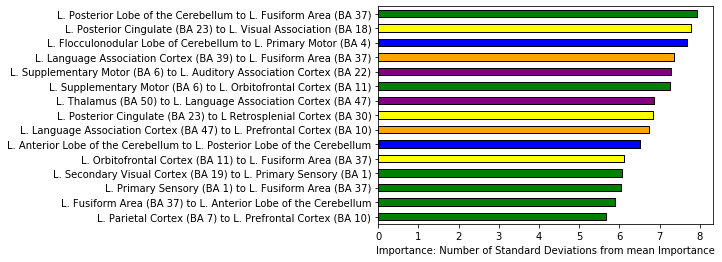

In [181]:
lsColors=[[
    'g',
    'yellow',
    'blue',
    'orange',
    'purple',
    'g',
    'purple',
    'yellow',
    'orange',
    'b',
    'yellow',
    'g',
    'g',
    'g',
    'g'
]]
lsColors[0].reverse()
pdTop122.sort_values(by=['Importance'], axis=0).plot(kind='barh', legend=None, edgecolor='k', stacked=True, color=lsColors)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')
plt.savefig('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/AtlasResolutionComparison8Permutations/122ROI_FunctionalImportancesColorCoded.png', bbox_inches='tight')

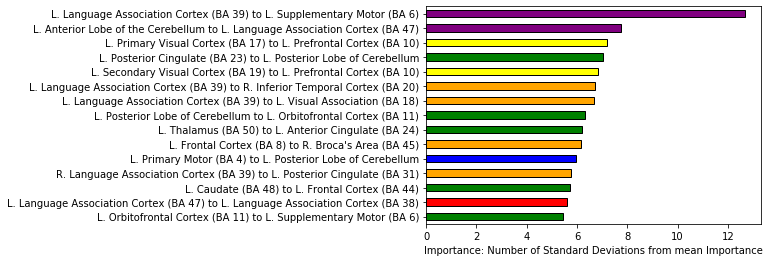

In [178]:
lsColors=[[
    'purple',
    'purple',
    'yellow',
    'g',
    'yellow',
    'orange',
    'orange',
    'g',
    'g',
    'orange',
    'b',
    'orange',
    'g',
    'r',
    'g'
]]
lsColors[0].reverse()
pdTop197.sort_values(by=['Importance'], axis=0).plot(kind='barh', legend=None, edgecolor='k', stacked=True, color=lsColors)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')
plt.savefig('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/JournalPaperData/AtlasResolutionComparison8Permutations/197ROI_FunctionalImportancesColorCoded.png', bbox_inches='tight')

In [37]:
lsDeep=list(pdTopDeep.index)
lsLin=list(pdTopLin.index)

In [38]:
list(set(lsDeep).intersection(lsLin))

[]

*******************************************
NOW, we do the same thing for the structural data

In [39]:
iModelLin=14
iModelDeep=13

In [40]:
sAtlas='anat'

In [41]:
# Load importances
dDeepImportances = pkl.load(open(os.path.join(sDir, f'Model{iModelDeep}Importances.p'), 'rb'))
pdDeepImportances = bob.fFormatImportances(dDeepImportances)

# Load importances
dLinImportances = pkl.load(open(os.path.join(sDir, f'Model{iModelLin}Importances.p'), 'rb'))
pdLinImportances = bob.fFormatImportances(dLinImportances)

In [42]:
pdTopDeep=pdDeepImportances.sort_values(by=['Importance'], axis=0, ascending=False).head(15)
pdTopLin=pdLinImportances.sort_values(by=['Importance'], axis=0, ascending=False).head(15)

pdTopStructDeep=pdDeepImportances.loc[[x for x in pdDeepImportances.index if not (x.__contains__('Site') or x.__contains__('Sex'))]]
pdTopStructDeep=pdTopStructDeep.sort_values(by=['Importance'], axis=0, ascending=False).head(15)

pdTopStructLin=pdLinImportances.loc[[x for x in pdLinImportances.index if not (x.__contains__('Site') or x.__contains__('Sex'))]]
pdTopStructLin=pdTopStructLin.sort_values(by=['Importance'], axis=0, ascending=False).head(15)


Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

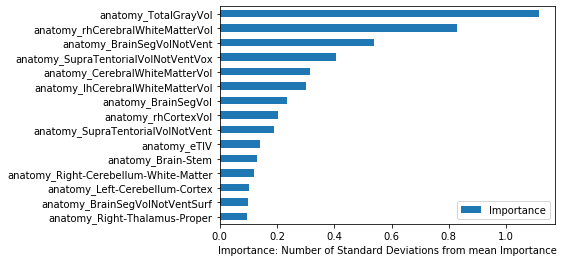

In [43]:
pdTopStructDeep.iloc[::-1].plot(kind='barh')
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

In [44]:
lsNewIndex=[
   'Total Gray Matter Volume',
   'Right Cerebral White Matter Volume',
   'Brain Segmentation Volume-No Ventricles', 
   'Suprarentorial Volume-No Ventricles',
   'Cerebral White Matter Volume',
   'Left Cerebral White Matter Volume',
   'Brain Segmentation Volume', 
   'Right Cortex Volume',
   'Supratentorial Volume',
   'Total Intracranial Volume',
   'Brainstem Volume',
   'Right Cerebellum White Matter Volume',
   'Left Cerebellum Cortical Volume',
   'Brain Segmentation Volume-No Ventricles',
   'Right Thalamus Volume']

In [45]:
pdTopStructDeep.index=lsNewIndex

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

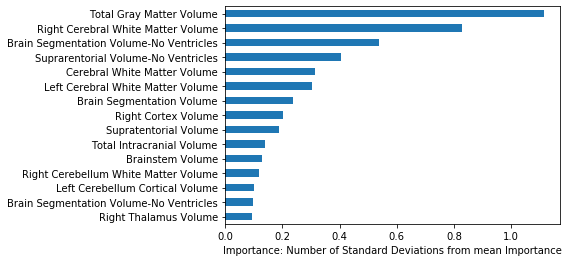

In [46]:
pdTopStructDeep.iloc[::-1].plot(kind='barh', legend=None)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

Text(0.5, 0, 'Importance: σ from Mean Importance')

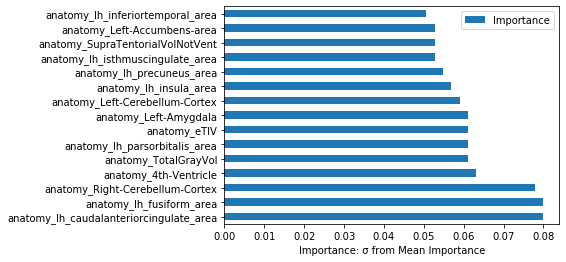

In [47]:
pdTopStructLin.plot(kind='barh')
plt.xlabel('Importance: \u03C3 from Mean Importance')

In [48]:
pdTopStructLin.index

Index(['anatomy_lh_caudalanteriorcingulate_area', 'anatomy_lh_fusiform_area',
       'anatomy_Right-Cerebellum-Cortex', 'anatomy_4th-Ventricle',
       'anatomy_TotalGrayVol', 'anatomy_lh_parsorbitalis_area', 'anatomy_eTIV',
       'anatomy_Left-Amygdala', 'anatomy_Left-Cerebellum-Cortex',
       'anatomy_lh_insula_area', 'anatomy_lh_precuneus_area',
       'anatomy_lh_isthmuscingulate_area', 'anatomy_SupraTentorialVolNotVent',
       'anatomy_Left-Accumbens-area', 'anatomy_lh_inferiortemporal_area'],
      dtype='object')

In [49]:
lsNewLinIndex=[
   'Left Caudal Anterior Cingulate Area',
   'Left Fusiform Area',
   'Right Cerebellum Cortex Volume', 
   '4th-Ventricle Volume',
   'Total Gray Matter Volume',
   'Left Parsorbitalis Area',
   'Total Intracranial Volume',
   'Left Amygdala Volume',
   'Left Cerebellum Cortex Volume',
   'Left Insula Area',
   'Left Precuneus Area',
   'Left Isthmus-cingulate Area',
   'Supratentorial Volume-No Ventricles',
   'Left Accumbens Area',
   'Left Inferior Temporal Area'
]

In [50]:
pdTopStructLin.index=lsNewLinIndex

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

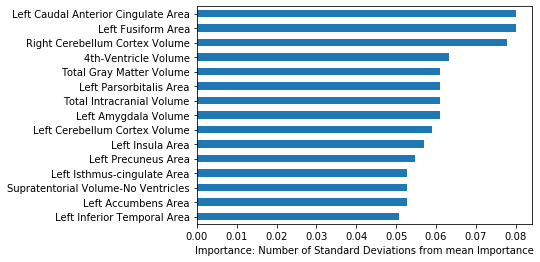

In [51]:
pdTopStructLin.iloc[::-1].plot(kind='barh', legend=None)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

Text(0.5, 0, '$log_{10}(\\alpha)$')

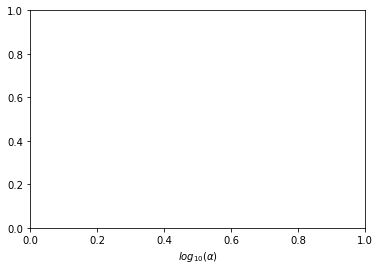

In [52]:
plt.xlabel(r'$log_{10}(\alpha)$')